In [4]:
import random
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

#lista pontos aleatorios
num_pontos = 30
raio_circulo = 5

pontos = set()

while len(pontos) < num_pontos:
    x = random.randint(0, 10)
    y = random.randint(0, 10)
    pontos.add((x, y))

pontos = list(pontos)




def gerar_pontos_circulares(n, raio):
    pontos = []
    angulo_incremento = 2 * math.pi / n

    for i in range(n):
        angulo = i * angulo_incremento
        x = raio * math.cos(angulo)
        y = raio * math.sin(angulo)
        pontos.append((x, y))

    return pontos


#pontos = gerar_pontos_circulares(num_pontos, raio_circulo)

pontos.append(pontos[0])
num_pontos = len(pontos)




#distancia euclidiana entre dois pontos
def calcular_distancia(p1, p2):
    return math.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)

#distancia total uma rota
def calcular_distancia_total(rota):
    distancia_total = 0
    for i in range(len(rota) - 1):
        distancia_total += calcular_distancia(rota[i], rota[i + 1])
    distancia_total += calcular_distancia(rota[-1], rota[0])
    return distancia_total

#rota inicial aleatoria
def criar_rota_inicial(pontos):
    rota = pontos[:]
    random.shuffle(rota)
    return rota



def crossover(rota1, rota2):
    
    ponto_corte = random.randint(1, num_pontos)
    ponto_corte2 = random.randint(1, num_pontos)
    
    inicio = min(ponto_corte, ponto_corte2)
    fim = max(ponto_corte, ponto_corte2)
    
    filho1 = rota1[inicio:fim]
    continuacao = [ponto for ponto in rota2 if ponto not in filho1]
    filho1.extend(continuacao)
    return filho1


#mutação em uma rota
def mutacao(rotas, taxa_mutacao):
    for i in range(len(rotas)):
        if random.random() < taxa_mutacao:
            j = random.randint(0, num_pontos - 2)
            k = random.randint(0, num_pontos - 2)
            rotas[i][k], rotas[i][j] = rotas[i][j], rotas[i][k]
    return rotas



In [5]:
def algoritmo_genetico(pontos, num_populacao, taxa_mutacao, num_geracoes, elite):
    
        
#inicializar a população
    populacao = [criar_rota_inicial(pontos) for _ in range(num_populacao)]
    #print(populacao)
    progresso = tqdm(total=num_geracoes, desc='Gerações')
    distancias_geral = []

#evolui pop
    for geracao in range(num_geracoes):
#avaliar aptidão de cada indivíduo
        aptidoes = [calcular_distancia_total(rota) for rota in populacao]
        #print(aptidoes)

        #ordenar a população com base nas aptidões (menor valor primeiro)
        populacao = [rota for _, rota in sorted(zip(aptidoes, populacao))]
        
        # Melhor solução
        melhor_rota = populacao[0]
        menor_distancia = aptidoes[0]
        distancias_geral.append(menor_distancia)
        filhos = []
        #elite
        for i in range(elite):
            filhos.append(populacao[i])
            
        populacao_elitizada = num_populacao - elite

        
        #retorna 1 filhos de cada pai
        for i in range(populacao_elitizada):
            pai = populacao[i]
            mae = populacao[i+1]
            
            filho1 = crossover(pai, mae)
            filhos.append(filho1)

            
        # mutação
        filhos_mutados = mutacao(filhos, taxa_mutacao)

        # nova população
        populacao = filhos_mutados

        progresso.update(1)

    progresso.close()

    return melhor_rota, menor_distancia, distancias_geral

Gerações: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.51it/s]


Menor distância percorrida: 52.967735947749844


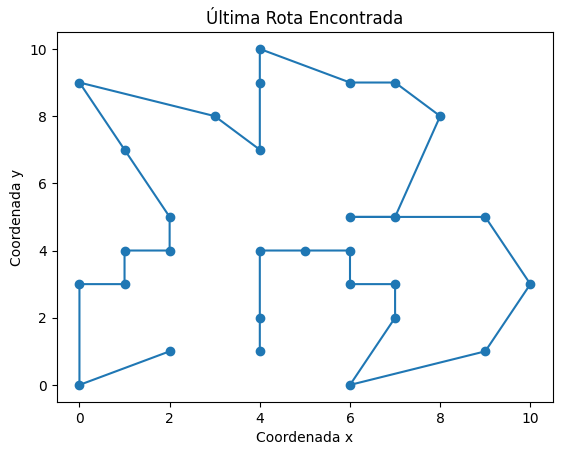

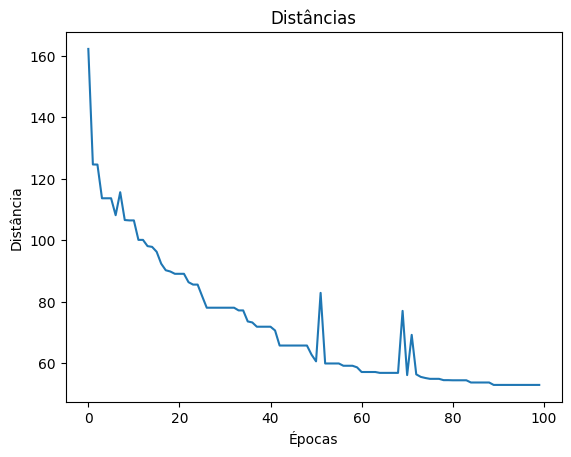

Primeiro individuo:  162.2912115759052
Menor distância encontrada em todas as gerações:  52.967735947749844


In [7]:
#executar o algoritmo genético
num_populacao = 1000
taxa_mutacao = 0.05
num_geracoes = 100
#define a elite, que será passada para a próxima geração sem mutação
elite = 300
melhor_rota, menor_distancia, distancias_geral = algoritmo_genetico(pontos, num_populacao, taxa_mutacao, num_geracoes, elite)


#print("Melhor rota encontrada:", melhor_rota)
print("Menor distância percorrida:", menor_distancia)
#print(len(melhor_rota))



x = [ponto[0] for ponto in melhor_rota]
y = [ponto[1] for ponto in melhor_rota]


plt.plot(x, y, marker='o')
#plt.scatter(x[1:-1], y[1:-1], color='blue')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Última Rota Encontrada')
#plt.legend()
plt.grid(False)
plt.show()



indices = range(len(distancias_geral))

# Plotar as distâncias em um gráfico de linhas
plt.plot(indices, distancias_geral)
plt.xlabel('Épocas')
plt.ylabel('Distância')
plt.title('Distâncias')
plt.show()

print('Primeiro individuo: ',distancias_geral[0])


print('Menor distância encontrada em todas as gerações: ', min(distancias_geral))